# <center>Acquisition Analytics</center> 

## Problem Statement<br>
A Portuguese bank had conducted a telemarketing campaign for a term deposit product.<BR>
Through the campaign, the bank had collected data about the prospects' demographics, other financial products they have purchased in the past (loans, deposits, etc.), the number of times they were called, etc. They also recorded the response from each prospect. <BR>
The bank's marketing team wants to launch yet another telemarketing campaign for the same product, so they want target such prospects which have more chances to respond. 
## Goal
- Build logistic regression model without using duration as feature variable and fine optimal cutoff.
- Find the Cost of all for each prospect
- To achieve 80% responders what number of prospects should be targeted
- Calculate Cost of acquisition

## Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.display import Markdown, display
def customPrint(msg):
    display(Markdown(msg))

In [4]:
pd.set_option("display.max.column", 30)

## Load Data

In [5]:
loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
loan.shape

(41188, 21)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

No null value preset in dataset.

In [9]:
#Duplicate value check
loan[loan.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Remove duplicate rows

In [10]:
loan = loan[~loan.duplicated()]
loan.shape

(41176, 21)

In [11]:
print(loan['response'].value_counts())
print(loan['response'].value_counts() / loan.index.size * 100 )

no     36537
yes     4639
Name: response, dtype: int64
no     88.733728
yes    11.266272
Name: response, dtype: float64


In [12]:
# Copy the dataset into a backup dataframe for future use

loan_copy = loan

## EDA (Exploratory Data Analysis)

In [13]:
#Get object type columns
objCol = loan.columns[loan.dtypes == 'object'] 
loan[objCol].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,response
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [14]:
#Get non object type columns i.e int or float
numCol = loan.columns[loan.dtypes != 'object']
loan[numCol].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


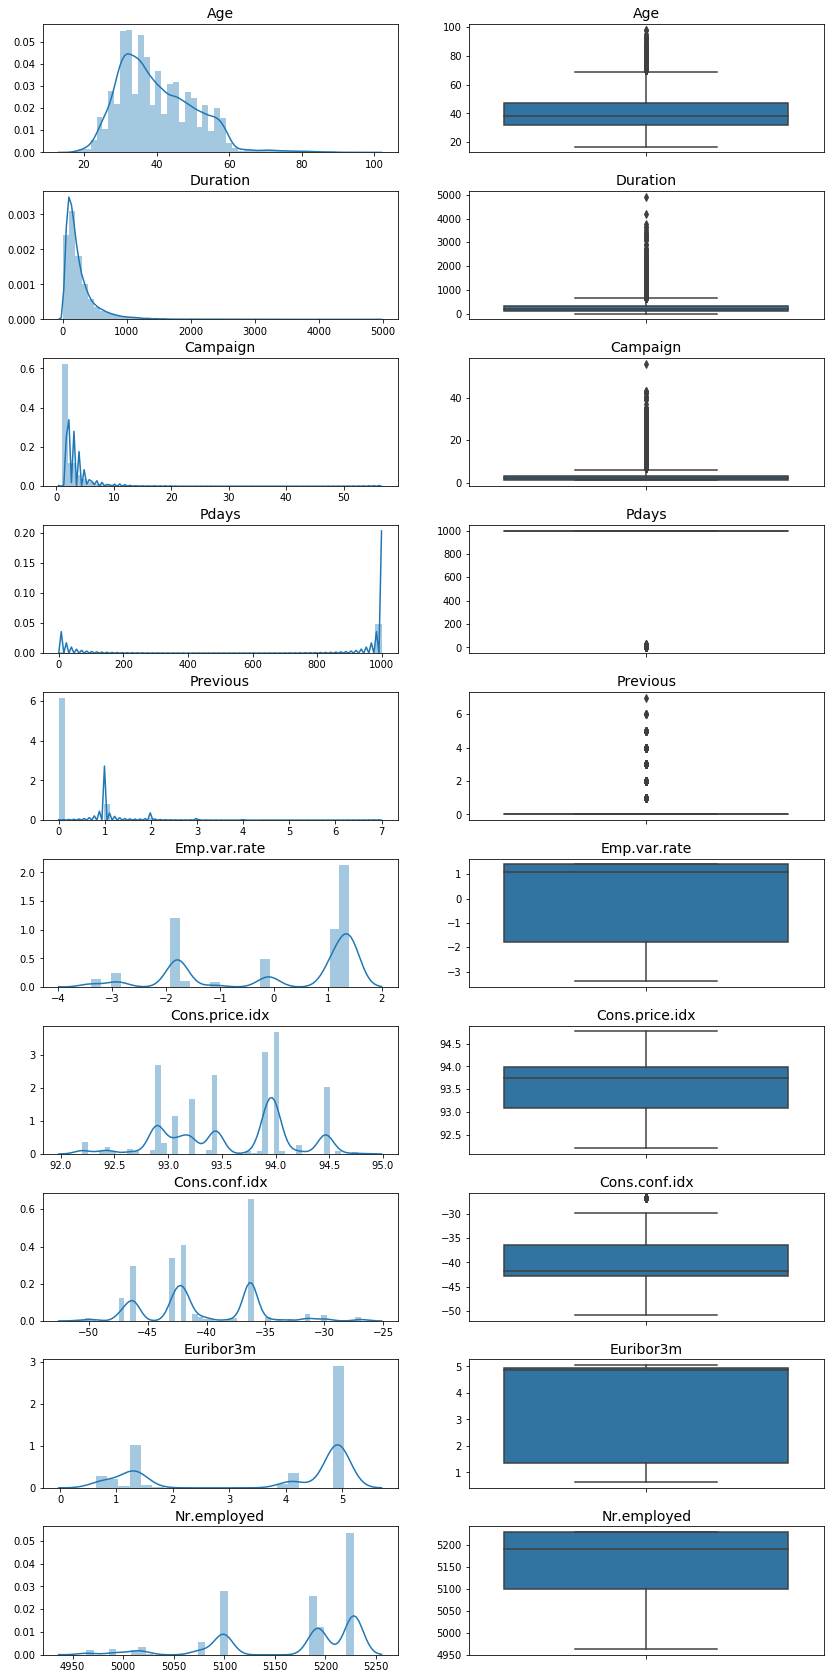

In [15]:
#Plotting numerical variable
plt.figure(figsize=(14,30))
i = 0
for col in numCol:
    i = i+1
    ax1 = plt.subplot(numCol.size ,2,i)
    sns.distplot(loan[col], ax=ax1)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title(col.capitalize(), fontsize=14)
    
    i = i+1
    ax2 = plt.subplot(numCol.size ,2,i)
    ax2= sns.boxplot(data=loan, y=col, ax=ax2)
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title(col.capitalize(), fontsize=14)

plt.subplots_adjust(hspace=0.3)
plt.show()

There is an outlier in **Age, Duration, Campaign**.<BR>
Will remove outlier rows using 99 percentile value.

In [16]:
loan[['age','duration','campaign']].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

,age,duration,campaign
count,41176.00000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879
std,10.42068,259.305321,2.770318
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
95%,58.00000,753.000000,7.000000
99%,71.00000,1271.250000,14.000000
max,98.00000,4918.000000,56.000000


In [17]:
loan['age'][loan['age']>71] = 71
loan['duration'][loan['duration']>1271] = 1271
loan['campaign'][loan['campaign']>14] = 14

In [18]:
def ResponseRatio(df, col, plotGraph=False, tickRotation= 0):
    No_of_prospect = df.groupby(col)['response'].count().reset_index(name = 'no_of_prospect')
    No_of_response = df[df['response']=="yes"].groupby(col)['response'].count().reset_index(name = 'no_of_response')
    tempDf = No_of_prospect.merge(No_of_response, how='left', on=col)
    tempDf['no_of_response'].fillna(0, inplace=True)
    tempDf['response_rate'] = round(100*(tempDf['no_of_response']/tempDf['no_of_prospect']), 2)
    
    if(plotGraph == True):
        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(121)
        sns.barplot(data=tempDf, x=col, y='response_rate', ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=tickRotation)
        ax1.set_xlabel("")
        ax1.set_title(col.capitalize(), fontsize=14)

        ax2 = fig.add_subplot(122)
        bbox=[0, 0, 1.5, 0.9]
        ax2.axis('off')

        mpl_table = ax2.table(cellText = tempDf.values, bbox=bbox, colLabels=tempDf.columns)
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(14)
        
        plt.show()
    else:
        return tempDf

### Perform Bivariate analysis<BR>
Compare response rate against each variable.

**Age**

In [19]:
ageBins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], ageBins, include_lowest=True)

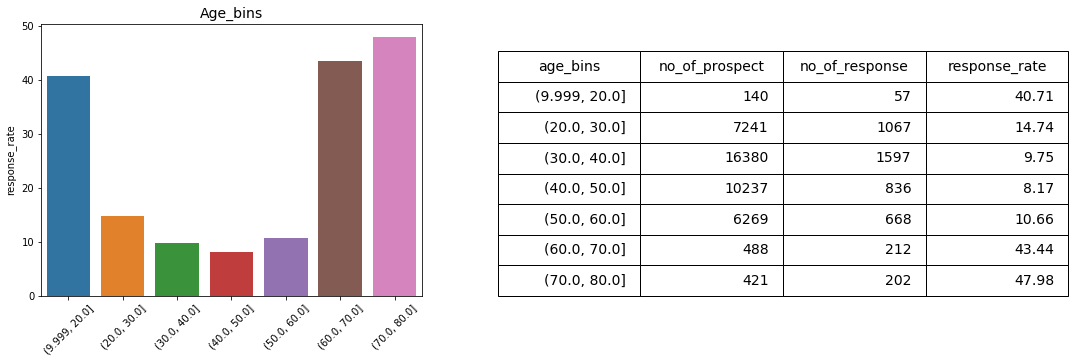

In [20]:
ResponseRatio(loan, 'age_bins', True, 45)

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

**Job**

In [21]:
loan['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

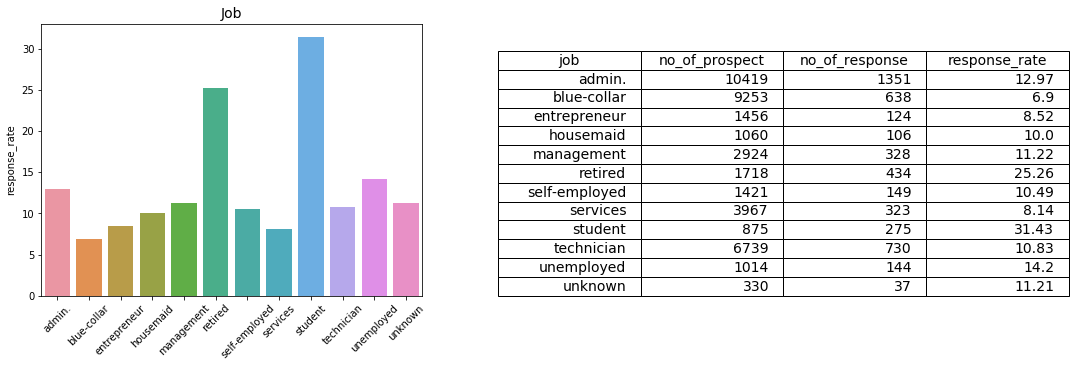

In [22]:
ResponseRatio(loan, 'job', True, 45)

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is irreiterated by the above analysis, where we notice that student and retired have the highest response rates.

**Marital**

In [23]:
loan['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [24]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

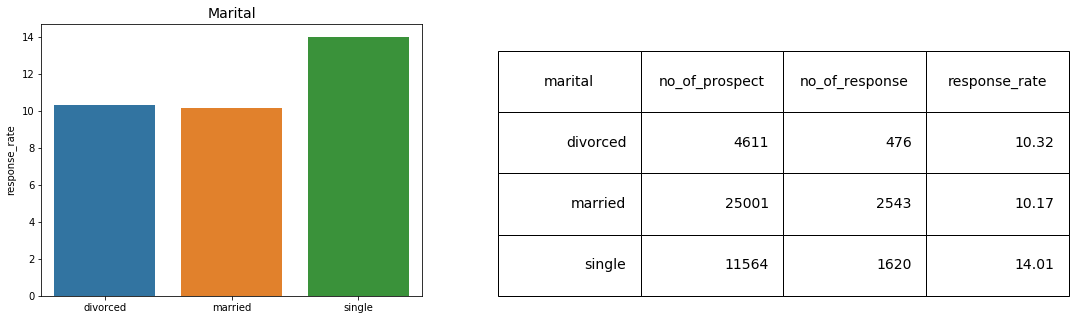

In [25]:
ResponseRatio(loan, 'marital', True)

There is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

**Education**

In [26]:
loan['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.


In [27]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

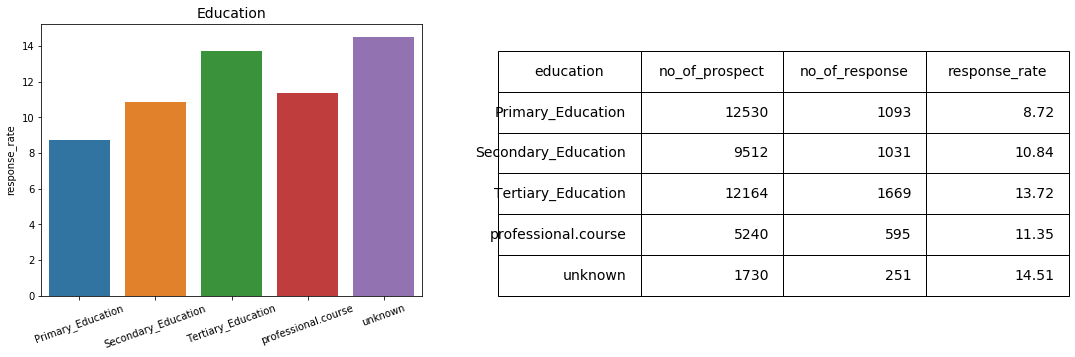

In [28]:
ResponseRatio(loan, 'education', True, 20)

Response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

**Previous Default**

In [29]:
loan['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

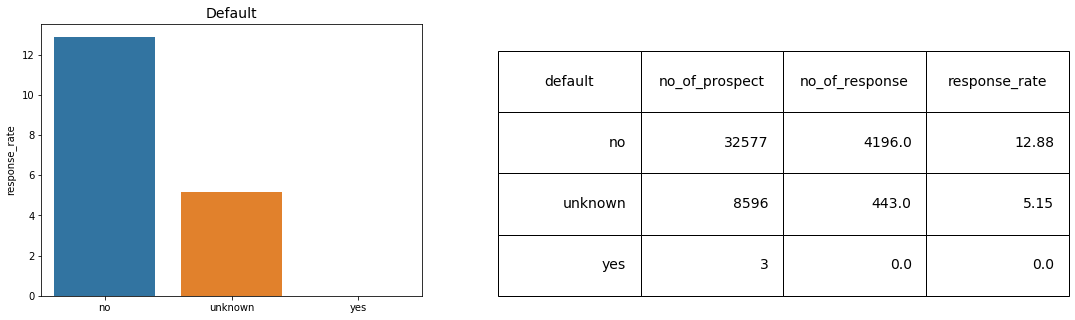

In [30]:
ResponseRatio(loan, 'default', True)

**Housing**

In [31]:
loan['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

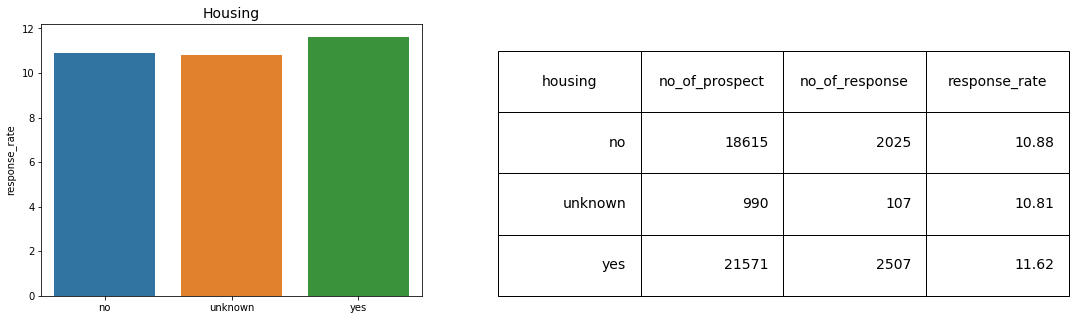

In [32]:
ResponseRatio(loan, 'housing', True)

There is a slight uptick in the response rate for people with housing, though it is probably not very significant

**Loan**

In [33]:
loan['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

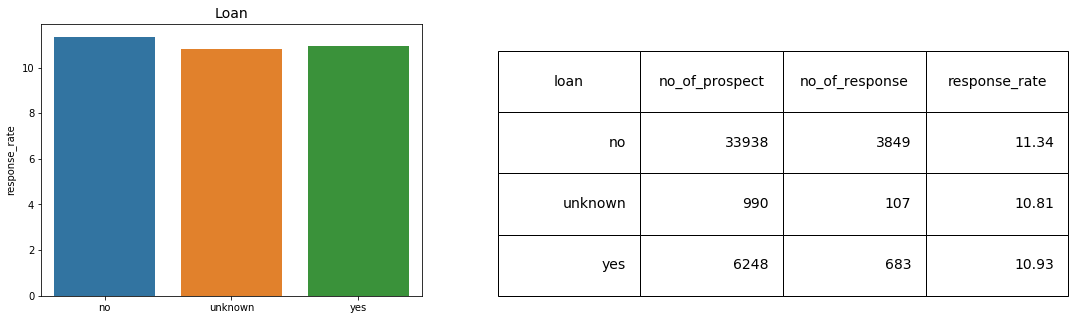

In [34]:
ResponseRatio(loan, 'loan', True)

Now that we have had a look at the client data, we will move to the last contact information.

**Contact**

In [35]:
loan['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

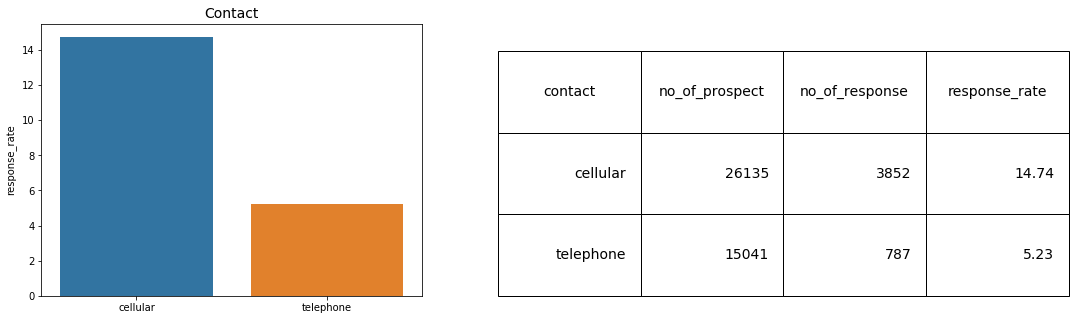

In [36]:
ResponseRatio(loan, 'contact', True)

The prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

**Month**

In [37]:
loan['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

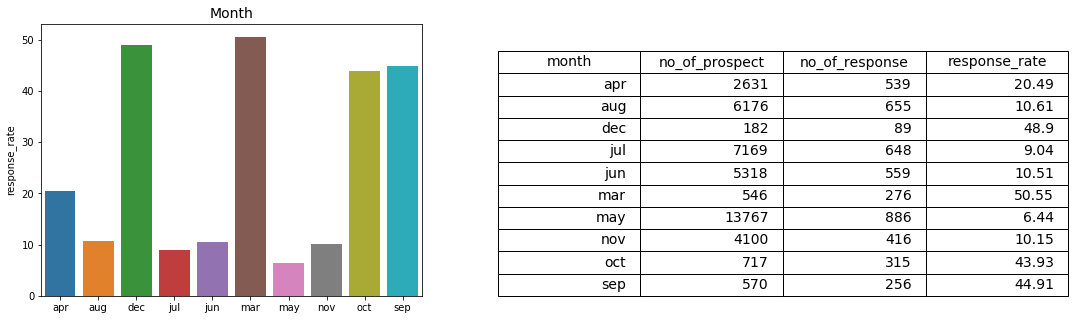

In [38]:
ResponseRatio(loan, 'month', True)

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

**Day of the week**

In [39]:
loan['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

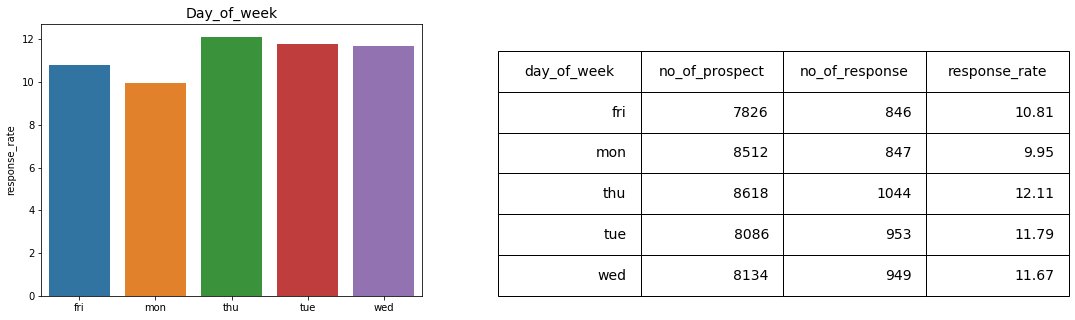

In [40]:
ResponseRatio(loan, 'day_of_week', True)

Response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

**Campaign**

In [41]:
loan['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
14      475
8       400
9       283
10      225
11      177
12      125
13       92
Name: campaign, dtype: int64

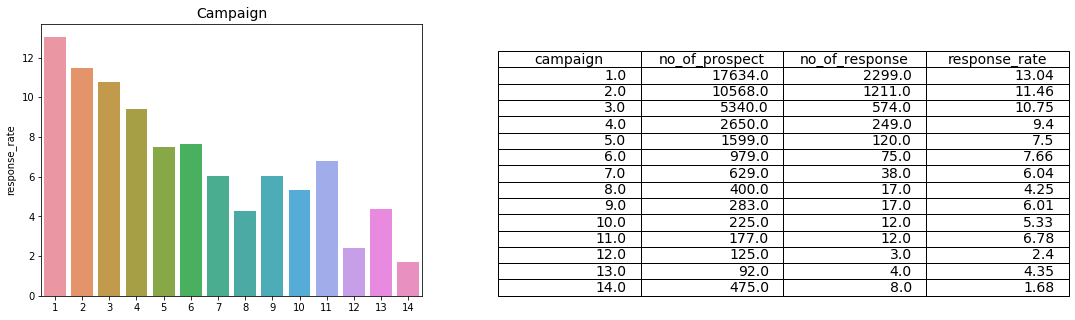

In [42]:
ResponseRatio(loan, 'campaign', True)

The response rate gradually decreases as the number of campaign contacts increases.

**Gap after the last contact**

In [43]:
loan['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [44]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [45]:
loan['pdays'].value_counts()

First_time_contacted         39661
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

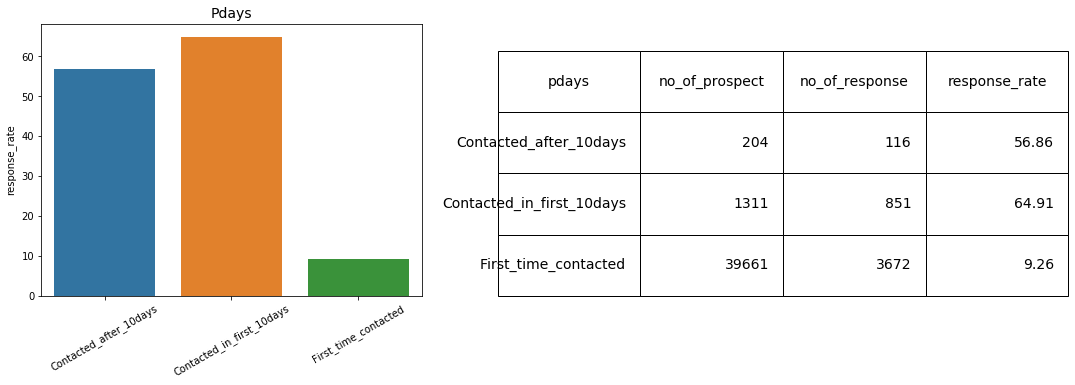

In [46]:
ResponseRatio(loan, 'pdays', True, 30)

**Previous**

In [47]:
loan['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [48]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less than 3 times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than 3 times'

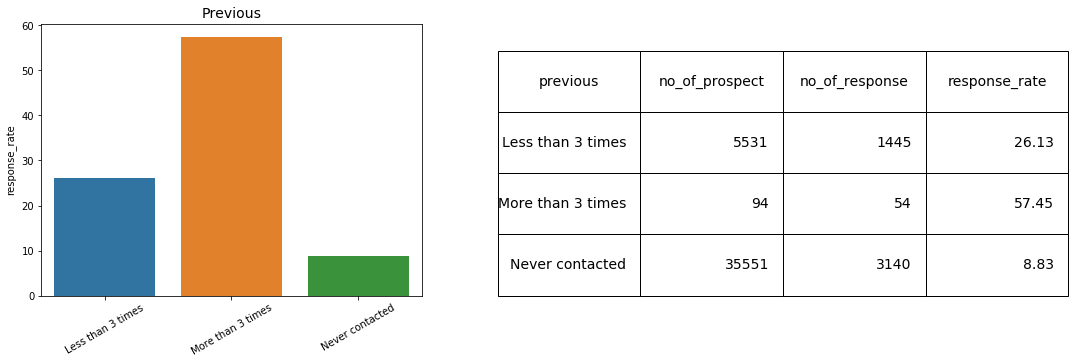

In [49]:
ResponseRatio(loan, 'previous', True, 30)

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

**Employment Variation Rate¶**

In [50]:
loan['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

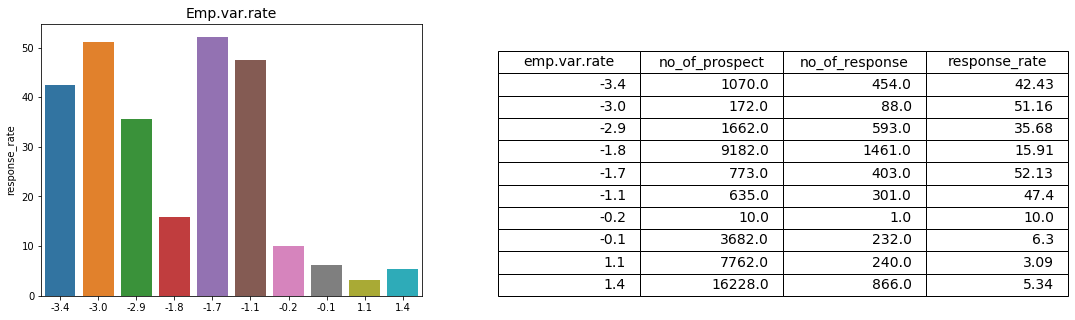

In [51]:
ResponseRatio(loan, 'emp.var.rate', True)

Negative employment variation rate seems to be related to higher response rates.

**Consumer Price Index**

In [52]:
loan['cons.conf.idx'].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

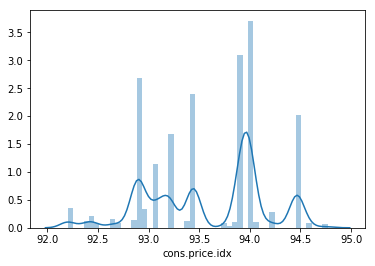

In [53]:
sns.distplot(loan['cons.price.idx'])
plt.show()

**Euribor three month rate**

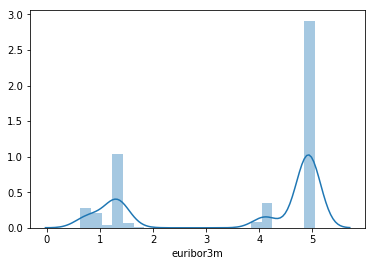

In [54]:
#Rate eill have many values so will only plot distribution plot
sns.distplot(loan['euribor3m'])
plt.show()

**Number of employeees**

In [55]:
loan['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

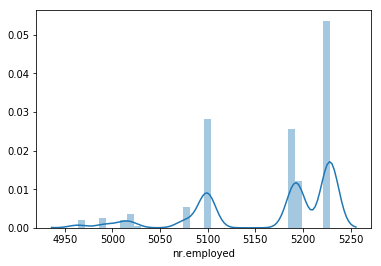

In [56]:
sns.distplot(loan['nr.employed'])
plt.show()

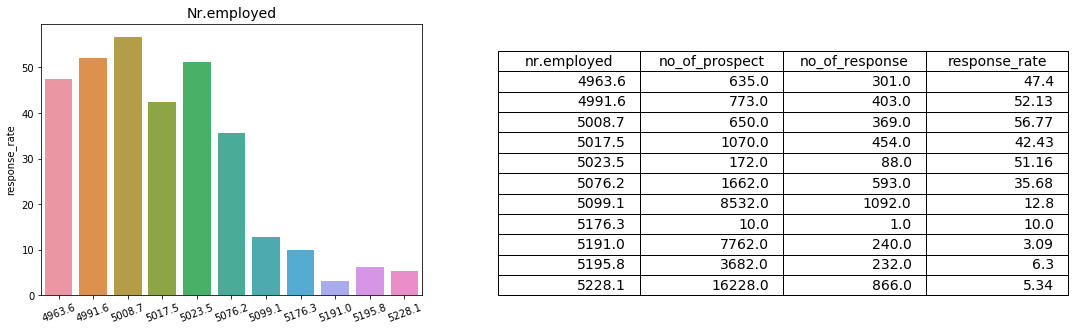

In [57]:
ResponseRatio(loan, 'nr.employed', True,20)

## Data Prepration

In [58]:
loan.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays               object
previous            object
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
response            object
age_bins          category
dtype: object

In [59]:
#Drop age_bins which we craeted for analysis purpose only
#loan.drop(columns = 'age_bins', inplace = True)

### Create Dummy Variables for all Categorical variable

In [60]:
# job
job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)
loan = pd.concat([loan,job],axis=1)

# marital
marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

# education
education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

# defalut
default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

# housing
housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

# loan
loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

# contact
contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

# month
month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

# day_of_week
day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

# pdays
pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

# previous
previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

# poutcome
poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [61]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than 3 times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,261,1,First_time_contacted,Never contacted,nonexistent,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,149,1,First_time_contacted,Never contacted,nonexistent,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,226,1,First_time_contacted,Never contacted,nonexistent,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,151,1,First_time_contacted,Never contacted,nonexistent,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,307,1,First_time_contacted,Never contacted,nonexistent,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0


In [62]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

## Model Building

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
import statsmodels.api as sm
from sklearn.decomposition import PCA, IncrementalPCA

In [64]:
loan.shape

(41176, 53)

In [65]:
loan[loan[loan.columns.drop('duration')].duplicated()]

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than 3 times,previous_Never contacted,poutcome_nonexistent,poutcome_success
10,41,55,1,1.1,93.994,-36.4,4.857,5191.0,no,"(40.0, 50.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
11,25,222,1,1.1,93.994,-36.4,4.857,5191.0,no,"(20.0, 30.0]",0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
16,35,312,1,1.1,93.994,-36.4,4.857,5191.0,no,"(30.0, 40.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
31,59,386,1,1.1,93.994,-36.4,4.857,5191.0,no,"(50.0, 60.0]",0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
79,42,208,1,1.1,93.994,-36.4,4.857,5191.0,no,"(40.0, 50.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
104,52,190,1,1.1,93.994,-36.4,4.857,5191.0,no,"(50.0, 60.0]",0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
145,42,528,1,1.1,93.994,-36.4,4.857,5191.0,no,"(40.0, 50.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
146,42,541,1,1.1,93.994,-36.4,4.857,5191.0,no,"(40.0, 50.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
149,51,87,1,1.1,93.994,-36.4,4.857,5191.0,no,"(50.0, 60.0]",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
220,35,216,2,1.1,93.994,-36.4,4.857,5191.0,no,"(30.0, 40.0]",0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0


In [66]:
loan = loan[~loan[loan.columns.drop('duration')].duplicated()]
loan.reset_index(inplace=True)

In [67]:
#Add Prospect number for tracability
loan['prospect_id'] = np.arange(1, loan.index.size+1)
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [68]:
# Putting feature variable to X
X = loan.drop(['response', 'duration', 'age_bins', 'prospect_id'],axis=1)

# Putting response variable to y
y = loan['response']

In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify = y )

In [70]:
#Scale data using Standard Scaler
sc = StandardScaler()
cols = ['age','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [71]:
X_train.head()

,index,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than 3 times,previous_Never contacted,poutcome_nonexistent,poutcome_success
18547,19519,0.289920,0.191360,1.4,-0.224392,0.948049,0.788380,0.856776,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
24205,25649,-0.788360,-0.664750,-0.1,-0.641424,-0.321718,0.302521,0.413241,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0
11103,11502,0.289920,-0.664750,1.4,1.520643,-0.278675,0.783223,0.856776,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
22535,23885,0.485971,-0.236695,1.4,-0.224392,0.948049,0.785515,0.856776,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
25239,26753,-0.396258,-0.236695,-0.1,-0.641424,-0.321718,0.277311,0.413241,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0


**Logistic Regression**

**Feature Selection**<BR>
Will use RFE (Recursive Feature Elimination) technique to select most important features from **17** different features.

In [72]:
lr = LogisticRegression(class_weight='balanced', random_state=100)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
dfRFE = pd.DataFrame(data=np.array([X_train.columns, rfe.support_, rfe.ranking_]).T, columns=['Feature', 'Support', 'Rank'])
dfRFE.sort_values(by='Rank')

,Feature,Support,Rank
50,poutcome_success,True,1
26,default_yes,True,1
29,loan_unknown,True,1
31,contact_telephone,True,1
32,month_aug,True,1
15,job_student,True,1
33,month_dec,True,1
34,month_jul,True,1
12,job_retired,True,1
35,month_jun,True,1


In [74]:
cols = list(dfRFE[dfRFE['Rank'] == 1]['Feature'])

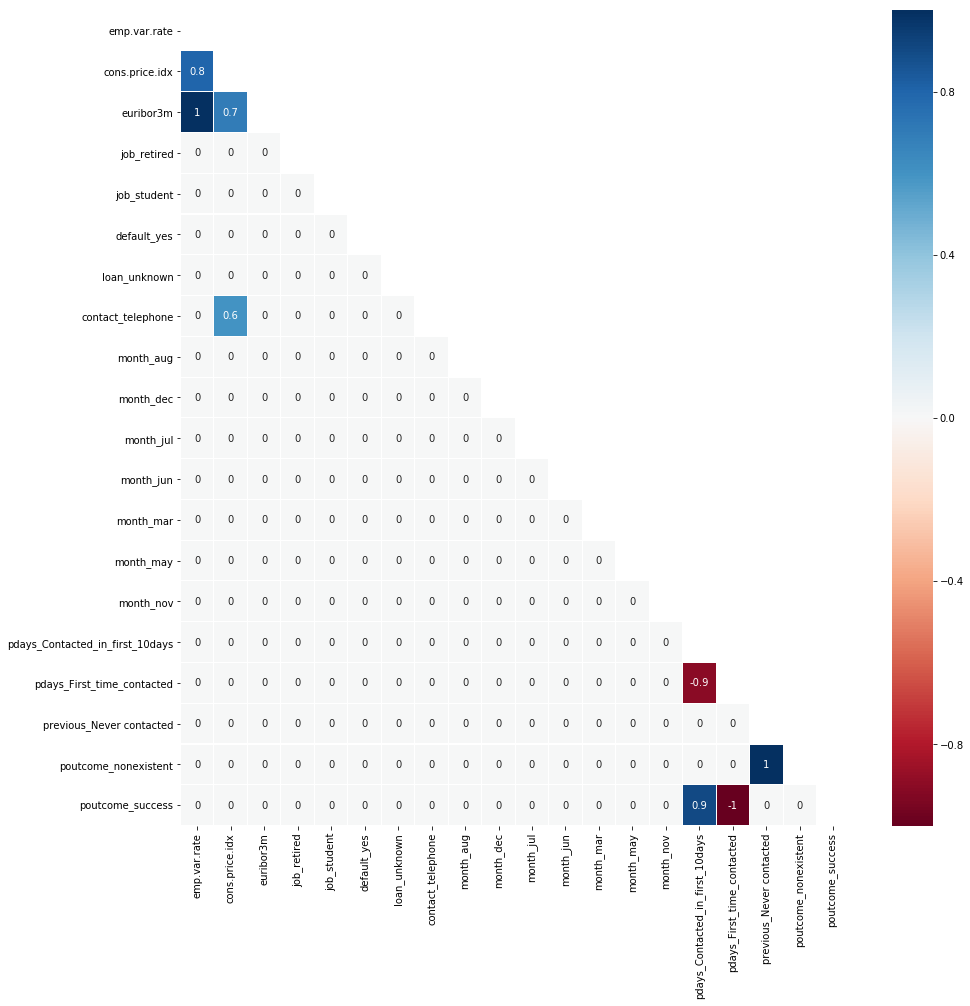

In [75]:
#Check correlation using Heatmap
corr = round(X_train[cols].corr().applymap(lambda x : 0 if x > -0.5 and x < 0.5 else x ), 1)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, linewidths=0.1)
plt.show()

Few of the variables are highly correlated with each other.<Br>
Will drop such variable before building model.

In [76]:
X_train.drop(labels=['pdays_Contacted_in_first_10days','emp.var.rate','previous_Never contacted','pdays_First_time_contacted'], inplace=True, axis=1)
cols.remove('pdays_Contacted_in_first_10days')
cols.remove('emp.var.rate')
cols.remove('previous_Never contacted')
cols.remove('pdays_First_time_contacted')

Generic Method to get LR Model & VIF score

In [77]:
def GetLRModel(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lr = sm.GLM(y_train, X_train_lm, family=sm.families.Binomial(), ).fit()
    print(lr.summary())
    return (lr, X_train_lm)

In [78]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    return vifScore

In [79]:
#First Logistic regression Model
lr_1, train_lm_1 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27412
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7949.4
Date:                Mon, 04 Nov 2019   Deviance:                       15899.
Time:                        23:55:52   Pearson chi2:                 2.94e+04
No. Iterations:                    19   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7363      0.085    -32.203      0.000      -2.903      -2.570
cons.price.idx        

There are few insignificant features with high **P-value** is **default_yes, month_nov, month_jun, loan_unknown**<BR>
Lets drop these features one by one and check updated P-value.

In [80]:
#Model - 2
cols.remove("default_yes")
lr_2, train_lm_2 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27413
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7949.5
Date:                Mon, 04 Nov 2019   Deviance:                       15899.
Time:                        23:55:52   Pearson chi2:                 2.94e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7366      0.085    -32.207      0.000      -2.903      -2.570
cons.price.idx        

In [81]:
#Model - 3
cols.remove("month_nov")
lr_3, train_lm_3 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27414
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7949.6
Date:                Mon, 04 Nov 2019   Deviance:                       15899.
Time:                        23:55:52   Pearson chi2:                 2.93e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7165      0.075    -36.323      0.000      -2.863      -2.570
cons.price.idx        

In [82]:
#Model - 4
cols.remove("month_jun")
lr_4, train_lm_4 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27415
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7950.1
Date:                Mon, 04 Nov 2019   Deviance:                       15900.
Time:                        23:55:52   Pearson chi2:                 2.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6986      0.072    -37.393      0.000      -2.840      -2.557
cons.price.idx        

In [83]:
#Model - 5
cols.remove("loan_unknown")
lr_5, train_lm_5 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27416
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7951.1
Date:                Mon, 04 Nov 2019   Deviance:                       15902.
Time:                        23:55:52   Pearson chi2:                 2.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7042      0.072    -37.520      0.000      -2.845      -2.563
cons.price.idx        

In [84]:
#Now P-value of all features looks good.
#Check for multicollinearity using VIF score
GetVIFScore(X_train[cols])

,Features,VIF
0,cons.price.idx,3.06
1,euribor3m,2.82
2,job_retired,1.07
3,job_student,1.06
4,contact_telephone,3.63
5,month_aug,1.83
6,month_dec,1.03
7,month_jul,1.79
8,month_mar,1.06
9,month_may,2.13


In [85]:
#Model - 6
cols.remove("poutcome_nonexistent")
lr_6, train_lm_6 = GetLRModel(X_train[cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                27429
Model:                            GLM   Df Residuals:                    27417
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7977.9
Date:                Mon, 04 Nov 2019   Deviance:                       15956.
Time:                        23:55:53   Pearson chi2:                 2.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3063      0.044    -52.438      0.000      -2.392      -2.220
cons.price.idx        0.1709   

In [86]:
GetVIFScore(X_train[cols])

,Features,VIF
0,cons.price.idx,3.01
1,euribor3m,2.81
2,job_retired,1.06
3,job_student,1.06
4,contact_telephone,2.53
5,month_aug,1.32
6,month_dec,1.03
7,month_jul,1.11
8,month_mar,1.05
9,month_may,1.91


**P-Value** of all variable are significant as well as **VIF Score** also low. 

In [87]:
def EvaluateModel(lr_model, lr_model_data, y_actual, threshold, display = False, isGLM = True):
    if isGLM == True:
        pred = lr_model.predict(lr_model_data)
    else:
        pred = lr_model.predict_proba(lr_model_data)[:,1]
        
    pred = pred.values if isinstance(pred, pd.Series) == True else pred
    
    pred_df = pd.DataFrame(data= {'Responded' : y_actual.values, 'Response_Prob':pred.reshape(-1)})

    pred_df['Response_Prob'] = round(pred_df['Response_Prob'] * 100,2)
    pred_df['Prediction'] = pred_df['Response_Prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    pred_df = pred_df.sort_values(by='Response_Prob', ascending=False)
    accuracy = round(metrics.accuracy_score(pred_df['Responded'], pred_df['Prediction'] ), 2)
    sensitivity, specificity, _ = sensitivity_specificity_support(pred_df['Responded'], pred_df['Prediction'], average='binary' )
    sensitivity = round(sensitivity, 2)
    specificity = round(specificity, 2)
    auc = round(metrics.roc_auc_score(pred_df['Responded'], pred_df['Prediction'] ), 2)
    if display:
        print("********* " , threshold, " ***********")
        print("Accuracy : ", accuracy)
        print("Sensitivity : ", sensitivity)
        print("Specificity : ", specificity)
        print("ROC - AUC : ", auc)
    else:
        return (accuracy, sensitivity, specificity, auc, pred_df)

Identify threshold value using final GLM model.

In [88]:
modelPerf_lr6 = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr_6, train_lm_6, y_train, i)
    modelPerf_lr6.loc[i] = [i, accuracy, sensitivity, specificity, auc]

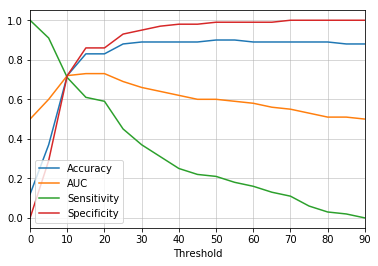

,Threshold,Accuracy,Sensitivity,Specificity,AUC
0,0.0,0.12,1.00,0.00,0.50
5,5.0,0.37,0.91,0.29,0.60
10,10.0,0.72,0.71,0.72,0.72
15,15.0,0.83,0.61,0.86,0.73
20,20.0,0.83,0.59,0.86,0.73
25,25.0,0.88,0.45,0.93,0.69
30,30.0,0.89,0.37,0.95,0.66
35,35.0,0.89,0.31,0.97,0.64
40,40.0,0.89,0.25,0.98,0.62
45,45.0,0.89,0.22,0.98,0.60


In [89]:
modelPerf_lr6.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr6

Lets build Logistic regression model using features identified using GLM model.

In [90]:
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

In [91]:
lr = LogisticRegression(class_weight="balanced", random_state=100)
param = {'C' : [0.01,0.1,1,10,100]}
model_cv = GridSearchCV(lr, param_grid=param, scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
model_cv.fit(X_train[cols], y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [92]:
lrScore = pd.DataFrame(model_cv.cv_results_)
lrScore[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.01,0.781199,0.781798
1,0.1,0.782097,0.782643
2,1,0.782124,0.782757
3,10,0.782120,0.782726
4,100,0.782118,0.782727


In [93]:
model_cv.best_params_

{'C': 1}

In [94]:
#Build Logistic regression model using hyperparameter value C = 0.01
lr = LogisticRegression(class_weight="balanced", C=1, random_state=100)
lr.fit(X_train[cols], y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(0, 91, 5):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr, X_train[cols], y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, sensitivity, specificity, auc]

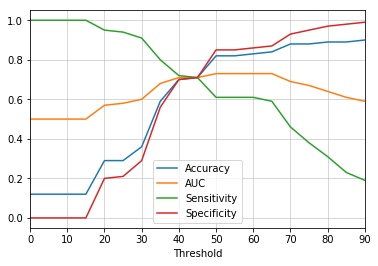

,Threshold,Accuracy,Sensitivity,Specificity,AUC
0,0.0,0.12,1.00,0.00,0.50
5,5.0,0.12,1.00,0.00,0.50
10,10.0,0.12,1.00,0.00,0.50
15,15.0,0.12,1.00,0.00,0.50
20,20.0,0.29,0.95,0.20,0.57
25,25.0,0.29,0.94,0.21,0.58
30,30.0,0.36,0.91,0.29,0.60
35,35.0,0.59,0.80,0.56,0.68
40,40.0,0.70,0.72,0.70,0.71
45,45.0,0.71,0.71,0.71,0.71


In [96]:
modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

Check for the threshold value between 30 & 50. 

In [97]:
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity', 'AUC'])
for i in range(30, 51, 1):
    accuracy, sensitivity, specificity, auc, df = EvaluateModel(lr, X_train[cols], y_train, i, isGLM=False)
    modelPerf_lr.loc[i] = [i, accuracy, sensitivity, specificity, auc]

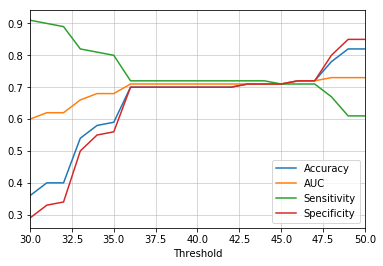

,Threshold,Accuracy,Sensitivity,Specificity,AUC
30,30.0,0.36,0.91,0.29,0.60
31,31.0,0.40,0.90,0.33,0.62
32,32.0,0.40,0.89,0.34,0.62
33,33.0,0.54,0.82,0.50,0.66
34,34.0,0.58,0.81,0.55,0.68
35,35.0,0.59,0.80,0.56,0.68
36,36.0,0.70,0.72,0.70,0.71
37,37.0,0.70,0.72,0.70,0.71
38,38.0,0.70,0.72,0.70,0.71
39,39.0,0.70,0.72,0.70,0.71


In [98]:
modelPerf_lr.plot.line( x='Threshold', y=['Accuracy', 'AUC', 'Sensitivity', 'Specificity'])
plt.grid(linestyle='-', linewidth = 0.5)
plt.show()
modelPerf_lr

**We are getting highest AUC, Accuracy, Sensitivity & Specificity at threshold value 44 (i.e. probability 0.44).**<BR>
So final model should use threshold as 44 for prediction.


In [99]:
#Evaluate model on Train & test Data using threshold value = 36
print("Evaluate Training Data Score")
EvaluateModel(lr, X_train[cols],y_train, 44, display=True, isGLM=False)

print()
print("Evaluate Test Data Score")
EvaluateModel(lr, X_test[cols],y_test, 44, display=True, isGLM=False)


Evaluate Training Data Score
*********  44  ***********
Accuracy :  0.71
Sensitivity :  0.72
Specificity :  0.71
ROC - AUC :  0.71

Evaluate Test Data Score
*********  44  ***********
Accuracy :  0.71
Sensitivity :  0.71
Specificity :  0.71
ROC - AUC :  0.71


**We are getting almost similar result on both data set, which means our predication model was neither underfitted nor overfitted on training data.**

Lets predict probability for complete data set including Train & Test data

In [100]:
c = ['age','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X[c] = sc.transform(X[c])

In [101]:
accuracy, sensitivity, specificity, auc, df_pred = EvaluateModel(lr, X[cols],y, 44, isGLM=False)
print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("ROC - AUC : ", auc)

Accuracy :  0.71
Sensitivity :  0.72
Specificity :  0.71
ROC - AUC :  0.71


In [102]:
df_pred.head()

,Responded,Response_Prob,Prediction
37350,1,98.68,1
37336,0,98.68,1
37335,1,98.68,1
37346,1,98.68,1
37166,1,98.67,1


In [103]:
df_pred = pd.concat([df_pred, loan[['prospect_id', 'duration']]], axis=1)

In [104]:
df_pred.head()

,Responded,Response_Prob,Prediction,prospect_id,duration
0,0,15.36,0,1,261
1,0,15.36,0,2,149
2,0,15.36,0,3,226
3,0,15.36,0,4,151
4,0,15.36,0,5,307


**Cost of Call**<br>
Assumption : Lets assume that call cost per minute is **1 Rs.**<BR>
If call duration is 80 Seconds (1 min, 20 Sec), it will apply 2 minute rate.   

In [105]:
import math

In [106]:
df_pred.shape

(39185, 5)

In [107]:
#Derive Minutes from seconds * Per Minute rate
df_pred['Cost_of_Call'] = df_pred['duration'].apply(lambda x: math.ceil(x / 60) * 1)
df_pred.head()

,Responded,Response_Prob,Prediction,prospect_id,duration,Cost_of_Call
0,0,15.36,0,1,261,5
1,0,15.36,0,2,149,3
2,0,15.36,0,3,226,4
3,0,15.36,0,4,151,3
4,0,15.36,0,5,307,6


**Lift Chart**

In [108]:
df_pred['decile'] = pd.qcut(df_pred['Response_Prob'], 10, labels=np.arange(10, 0, -1))
df_pred.head()

,Responded,Response_Prob,Prediction,prospect_id,duration,Cost_of_Call,decile
0,0,15.36,0,1,261,5,10
1,0,15.36,0,2,149,3,10
2,0,15.36,0,3,226,4,10
3,0,15.36,0,4,151,3,10
4,0,15.36,0,5,307,6,10


In [109]:
lift_df = df_pred.groupby('decile')['Response_Prob'].count().reset_index()
lift_df.rename({'Response_Prob':'TotalProspect'}, axis=1, inplace=True)

In [110]:
lift_df_pred = df_pred[df_pred['Responded']==1].groupby('decile')['Responded'].count().reset_index()
lift_df_pred

,decile,Responded
0,10,178
1,9,131
2,8,182
3,7,228
4,6,167
5,5,288
6,4,284
7,3,321
8,2,923
9,1,1885


In [111]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [112]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [113]:
lift_df_final['cumres'] = lift_df_final['Responded'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cumres']/sum(lift_df_final['Responded']))
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [114]:
lift_df_final

,decile,TotalProspect,Responded,cumres,gain,cumlift
9,1,3877,1885,1885,41.094397,4.109440
8,2,3958,923,2808,61.216481,3.060824
7,3,3514,321,3129,68.214519,2.273817
6,4,3744,284,3413,74.405930,1.860148
5,5,4223,288,3701,80.684543,1.613691
4,6,4101,167,3868,84.325267,1.405421
3,7,3890,228,4096,89.295836,1.275655
2,8,3964,182,4278,93.263571,1.165795
1,9,2628,131,4409,96.119468,1.067994
0,10,5286,178,4587,100.000000,1.000000


**Find the number of top X% prospects you should target to meet the business objective**

As per business objective we should acquire 80% of responders.<BR>
To acquire 80% responders, we should target a top 5 Decial (approx. 50%) prospects.

In [115]:
totalProspects = lift_df_final['TotalProspect'].sum()
targetProspects = lift_df_final[lift_df_final['gain'] < 81]['TotalProspect'].sum()
avgCallDuration = df_pred[df_pred['decile'] <= 5]['duration'].mean()

print("Top prospects {0} %".format(round(targetProspects / totalProspects * 100,2)))
print("Average call duration is {0} seconds".format(round(avgCallDuration, 2)))

Top prospects 49.29 %
Average call duration is 245.1 seconds


We have to target **top 49% **of prospects **to archive 80% of response rate.**<BR>
And average call duration per prospect would be **245.1 seconds**

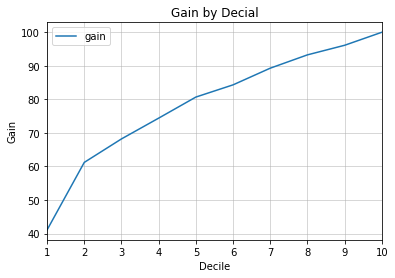

In [116]:
lift_df_final.plot.line(x='decile', y='gain')
plt.grid(linestyle='-', linewidth = 0.5)
plt.xlabel('Decile')
plt.ylabel('Gain')
plt.title("Gain by Decial")
plt.show()

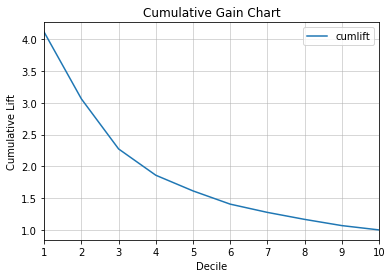

In [117]:
lift_df_final.plot.line(x='decile', y='cumlift')
plt.grid(linestyle='-', linewidth = 0.5)
plt.xlabel('Decile')
plt.ylabel('Cumulative Lift')
plt.title("Cumulative Gain Chart")
plt.show()

**Cost of Acquisition**

In [118]:
#As per given formula 
#cost = 1*number of contacts made in the current campaign
cost = 1 * targetProspects
print("Cost of acquisition is ", cost)

Cost of acquisition is  19316


We can also calculate cost using Cost Per Call and Average call duration.<BR>
**Cost = Target \* Avg Call Duration \* Cost Per Call**<BR>
Here, Cost per call = 1 Rs. per minute<BR>
Call Duration in Seconds


In [119]:
print("Cost of acquisition is {0} Rs.".format(targetProspects * math.ceil(avgCallDuration) * 1))

Cost of acquisition is 4751736 Rs.


**Cost of acquisition is 4,751,736.00 Rs.**